In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np
import contextily as cx

## Functions

### Missing values function

In [2]:
def missing_values(df):
    """
        input: dataframe
        returns: dict with 
                    Key => Column name 
                    Value => number of missing values
    """    
    missing_values_dict = {}

    for i, var in enumerate(df.columns):
        missing_values_dict[var] = np.sum(df[var].isnull())
    
    return missing_values_dict

### Plotting 2 Histograms function

In [36]:
def two_histograms(df, var1, var2, num_bins=10, title1="None", title2="None"):
    
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2

    f, ax = plt.subplots(1, 2, figsize=(15, 7))  # , figsize=(15, 15) 

    ax[0].hist(df[var1], alpha=0.2, bins=num_bins, edgecolor='white');
    ax[0].set_xlabel(var1, fontsize=14)
    ax[0].set_ylabel('count', fontsize=14)
    ax[0].set_title(title1)

    ax[1].hist(df[var2], alpha=0.2, bins=num_bins, edgecolor='white');
    ax[1].set_xlabel(var2, fontsize=14)
    ax[1].set_ylabel('count', fontsize=14)
    ax[1].set_title(title2)

    # f.suptitle("Histograms")

### Plotting One Histogram function

In [32]:
def one_histograms(df, var, num_bins=10, title="Histogram"):
    """
    input:
        df: input dataframe
        var: variable upon which histogram shall be made
    output:
        histogram plot
    """
    
    f, ax = plt.subplots(1, 1, figsize=(5, 5))  # , figsize=(15, 15) 

    ax.hist(df[var], alpha=0.2, bins=num_bins, edgecolor='white');
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('count', fontsize=14)
    ax.set_title(title)

    # f.suptitle(title)

### Two Maps function

In [54]:
def two_maps(df, var1, var2, title1="None", title2="None", title="None"):
    """
    
    """
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Maps"
        
    f, ax = plt.subplots(1, 2, figsize=(15, 8))  # , figsize=(15, 15) 

    df.plot(column=var1, ax=ax[0], legend=True, cmap="turbo")
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_axis_off()

    df.plot(column=var2, ax=ax[1], legend=True, cmap="turbo")
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_axis_off()

    ax[0].axis('equal')
    ax[1].axis('equal')

    f.suptitle(title, fontsize=20)

    plt.tight_layout()
    plt.show()

## Reading the data

1. loading district data
2. loding migration data

In [5]:
# loading district data
shp_path = '../data/shrug-pc11dist-poly-shp/district.shp'  # this is relative path

# loading migration data
mig_csv_path = '../data/covid_data/migration/csv/district_migration_pc11.csv'

# loading population data
pop_csv_path = '../data/covid_data/'

In [6]:
gdf = gpd.read_file(shp_path)  # geo-spatial dataframe for district shape file

df_mig = pd.read_csv(mig_csv_path)  # pandas dataframe for migration

In [7]:
gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
0,24,468,Kachchh,"MULTIPOLYGON (((70.45008 23.01226, 70.44904 23..."
1,24,469,Banas Kantha,"MULTIPOLYGON (((71.24964 24.20926, 71.24207 24..."
2,24,470,Patan,"MULTIPOLYGON (((71.42507 23.96967, 71.42497 23..."
3,24,471,Mahesana,"POLYGON ((72.79975 24.07615, 72.80022 24.07529..."
4,24,472,Sabar Kantha,"POLYGON ((73.14784 24.47759, 73.14773 24.47410..."


Checking the datatypes

In [8]:
gdf.dtypes

pc11_s_id      object
pc11_d_id      object
d_name         object
geometry     geometry
dtype: object

In [14]:
df_mig.dtypes

pc11_state_id            int64
pc11_district_id         int64
inltmigrantstotal      float64
inltmigrationrate      float64
inltmigrationshare     float64
instmigrantstotal      float64
instmigrationrate      float64
instmigrationshare     float64
outltmigrantstotal       int64
outltmigrationrate     float64
outltmigrationshare    float64
outstmigrantstotal       int64
outstmigrationrate     float64
outstmigrationshare    float64
dtype: object

> Changing state id and district id to integers from object

In [9]:
gdf["pc11_s_id"] = gdf["pc11_s_id"].astype(int)
gdf["pc11_d_id"] = gdf["pc11_d_id"].astype(int)

### Seperating the state data  

> **Maharashtra State**  
> *s_id = 27*

In [15]:
# Maharashtra geo-spatial dataframe
mh_gdf = gdf[gdf['pc11_s_id'] == 27]
mh_mig_df = df_mig[df_mig['pc11_state_id'] == 27]

In [16]:
mh_gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
496,27,497,Nandurbar,"POLYGON ((74.43555 22.03100, 74.43945 22.02652..."
497,27,498,Dhule,"POLYGON ((74.87001 21.63029, 74.87106 21.63024..."
498,27,499,Jalgaon,"POLYGON ((75.24348 21.41494, 75.24768 21.41067..."
499,27,500,Buldana,"POLYGON ((76.71231 21.28740, 76.71283 21.28734..."
500,27,501,Akola,"POLYGON ((77.07892 21.21607, 77.08324 21.21416..."


### Plots

**District map** of Maharashtra

<Axes: >

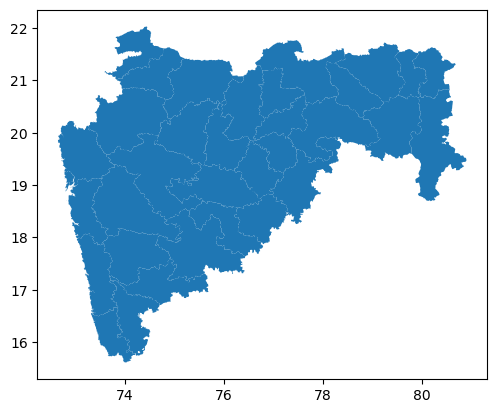

In [13]:
mh_gdf.plot()

In [17]:
mh_mig_df.head()

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
496,27,497,8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,8185802,0.008969,0.001806,10900000,0.016199,0.002458
497,27,498,8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,8185802,0.020634,0.005170,10900000,0.006169,0.001165
498,27,499,8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,8185802,0.016472,0.008512,10900000,0.004088,0.001592
499,27,500,8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,8185802,0.009724,0.003072,10900000,0.006478,0.001542
500,27,501,8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,8185802,0.013356,0.002960,10900000,0.000732,0.000122


### Renaming column names

Changing Migration dataframes's column's names to match geo-spatial data frame column's names

| Old Variable Name | New variable name |
| ----------------- | ----------------- |
| pc11_state_id     | pc11_s_id	        |
| pc11_district_id  | pc11_d_id         |

In [18]:
mh_df_NewCol_names = {
    'pc11_state_id' : 'pc11_s_id', 
    'pc11_district_id' : 'pc11_d_id' 
}

mh_mig_df = mh_mig_df.rename(columns=mh_df_NewCol_names)

In [19]:
mh_mig_df.head()

,pc11_s_id,pc11_d_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
496,27,497,8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,8185802,0.008969,0.001806,10900000,0.016199,0.002458
497,27,498,8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,8185802,0.020634,0.005170,10900000,0.006169,0.001165
498,27,499,8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,8185802,0.016472,0.008512,10900000,0.004088,0.001592
499,27,500,8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,8185802,0.009724,0.003072,10900000,0.006478,0.001542
500,27,501,8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,8185802,0.013356,0.002960,10900000,0.000732,0.000122


## Data Merging

In [21]:
print(mh_mig_df.shape)
print(mh_gdf.shape)

(35, 14)
(35, 4)


In [22]:
mh_gdf2 = mh_gdf.merge(mh_mig_df, on="pc11_d_id", how="left")

In [23]:
mh_gdf2.head()

,pc11_s_id_x,pc11_d_id,d_name,geometry,pc11_s_id_y,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,27,497,Nandurbar,"POLYGON ((74.43555 22.03100, 74.43945 22.02652...",27,8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,8185802,0.008969,0.001806,10900000,0.016199,0.002458
1,27,498,Dhule,"POLYGON ((74.87001 21.63029, 74.87106 21.63024...",27,8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,8185802,0.020634,0.005170,10900000,0.006169,0.001165
2,27,499,Jalgaon,"POLYGON ((75.24348 21.41494, 75.24768 21.41067...",27,8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,8185802,0.016472,0.008512,10900000,0.004088,0.001592
3,27,500,Buldana,"POLYGON ((76.71231 21.28740, 76.71283 21.28734...",27,8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,8185802,0.009724,0.003072,10900000,0.006478,0.001542
4,27,501,Akola,"POLYGON ((77.07892 21.21607, 77.08324 21.21416...",27,8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,8185802,0.013356,0.002960,10900000,0.000732,0.000122


In [24]:
mh_gdf2 = mh_gdf2.drop('pc11_s_id_y', axis=1)

In [25]:
# changing column name
s_id_col = {
    'pc11_s_id_x' : 'pc11_s_id', 
}
mh_gdf2 = mh_gdf2.rename(columns=s_id_col)

In [26]:
mh_gdf2.columns

Index(['pc11_s_id', 'pc11_d_id', 'd_name', 'geometry', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare'],
      dtype='object')

### Missing data

In [27]:
mh_gdf2.dtypes

pc11_s_id                 int32
pc11_d_id                 int32
d_name                   object
geometry               geometry
inltmigrantstotal       float64
inltmigrationrate       float64
inltmigrationshare      float64
instmigrantstotal       float64
instmigrationrate       float64
instmigrationshare      float64
outltmigrantstotal        int64
outltmigrationrate      float64
outltmigrationshare     float64
outstmigrantstotal        int64
outstmigrationrate      float64
outstmigrationshare     float64
dtype: object

In [28]:
mh_gdf2_missing_dict = missing_values(mh_gdf2)
mh_gdf2_missing_dict

{'pc11_s_id': 0,
 'pc11_d_id': 0,
 'd_name': 0,
 'geometry': 0,
 'inltmigrantstotal': 0,
 'inltmigrationrate': 0,
 'inltmigrationshare': 0,
 'instmigrantstotal': 0,
 'instmigrationrate': 0,
 'instmigrationshare': 0,
 'outltmigrantstotal': 0,
 'outltmigrationrate': 0,
 'outltmigrationshare': 0,
 'outstmigrantstotal': 0,
 'outstmigrationrate': 0,
 'outstmigrationshare': 0}

> **No Missing Values**

### EDA - Exploratory Data Analysis

#### Histogram

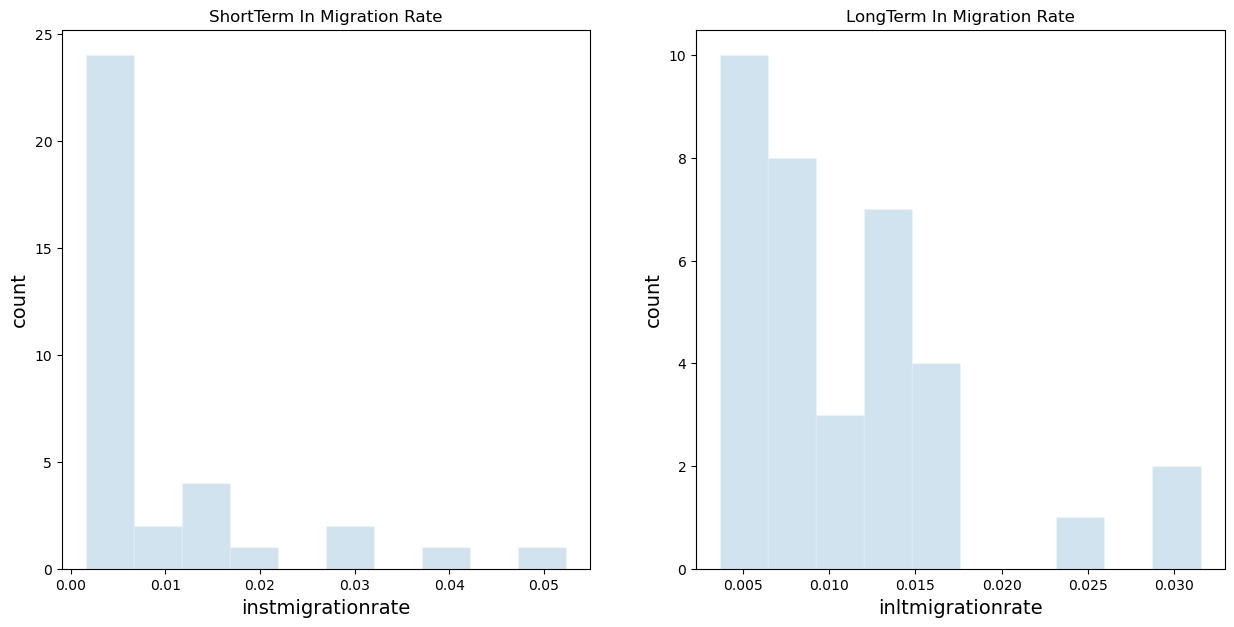

In [37]:
two_histograms(mh_gdf2, var1='instmigrationrate', var2='inltmigrationrate', num_bins=10, 
               title1="ShortTerm In Migration Rate", title2="LongTerm In Migration Rate")

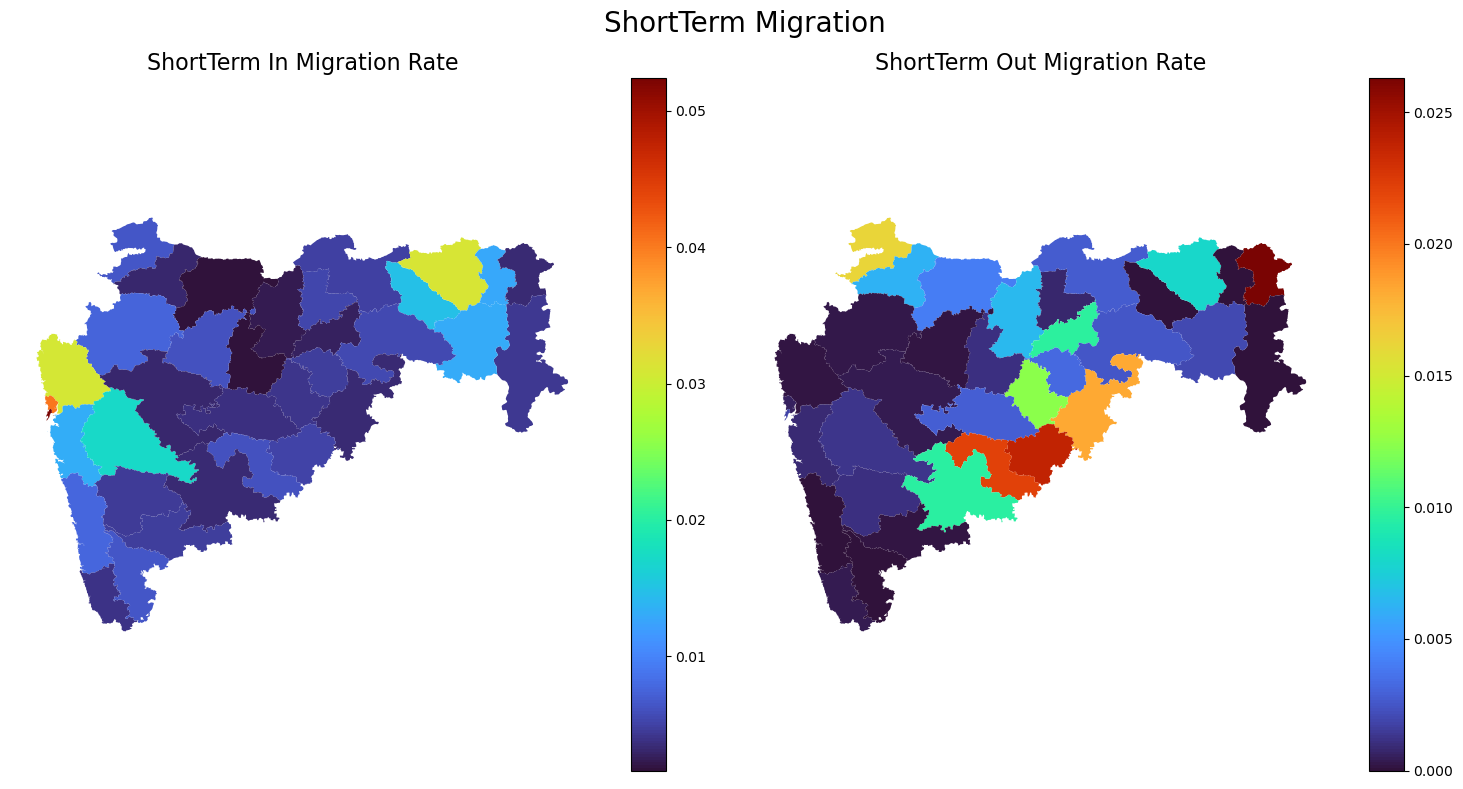

In [55]:
two_maps(mh_gdf2, var1="instmigrationrate", var2="outstmigrationrate", 
         title1="ShortTerm In Migration Rate", title2="ShortTerm Out Migration Rate", 
         title="ShortTerm Migration")

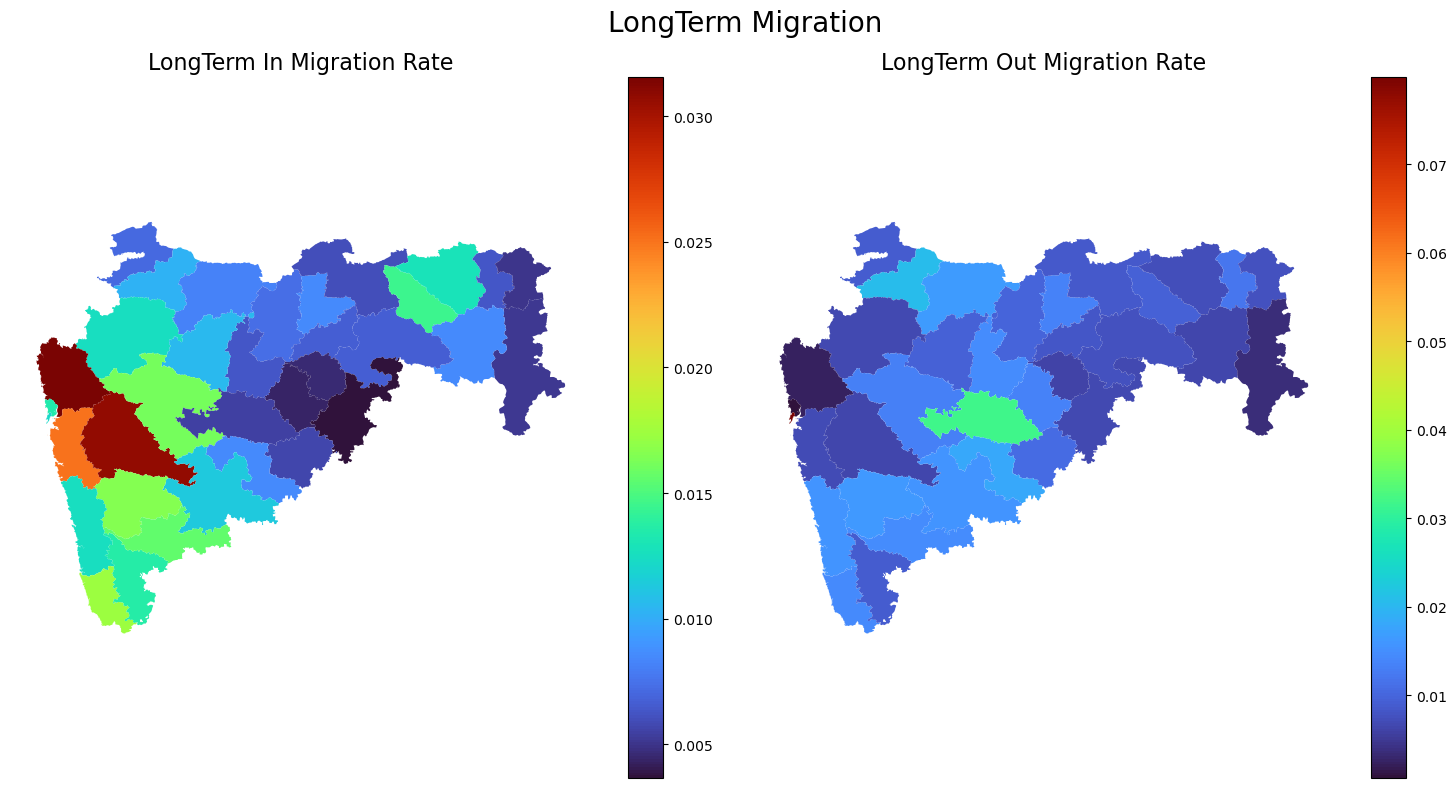

In [56]:
two_maps(mh_gdf2, var1="inltmigrationrate", var2="outltmigrationrate", 
         title1="LongTerm In Migration Rate", title2="LongTerm Out Migration Rate", 
         title="LongTerm Migration")

### Loading 